In [1]:
using PyPlot

const T=4000
const dt=0.01
const Tdt=convert(Int64,T/dt)
t=linspace(0,T,Tdt)

const eps=0.0025

0.0025

Interconnection of two excitable system, one oscillating $(x_{FruA},y_{FruA},x_{DevRST})=(x_{3},y_{3},x_{2})$, the other excitable $(x_{MrpC2},y_{MrpC2})=(x_{1},y_{1})$. In the oscillating system, $x_2=x_{DevRST}$ provides extra positive feedback to $FruA$. Disconnecting $DevRST$ kills oscillations in $FruA$. The fourth node $x_{RelA}=x_4$ is a bistable switch obtained by lumping the circuit composed of $RelA-SocE-CsgA$. When the bistable switch is switched to the low state by $Nut$, the oscillator is shut down.

In [2]:
#dynamic functions
node_dyn(x::Float64,beta::Float64,I::Float64,u::Float64,x0::Float64)=(-(x-1-0*x0)+tanh(beta*(x-1-x0)-2+I+u))
slow_dyn(y::Float64,u::Float64)=eps*(-y+u)

slow_dyn (generic function with 1 method)

In [3]:
function integration_loop()
    x1out=zeros(Tdt)
    y1out=zeros(Tdt)
    x2out=zeros(Tdt)
    x3out=zeros(Tdt)
    y3out=zeros(Tdt)
    x4out=zeros(Tdt)
    
    x1=1.0
    y1=0.5
    x2=0.1*rand(1,1)[1]
    x4=2.0
    x3=rand(1,1)[1]
    y3=rand(1,1)[1]
    
    for h=1:convert(Int64,Tdt/2)
        x1temp=x1+dt*node_dyn(x1,beta1,I1,-y1,0.0)
        y1temp=y1+dt*slow_dyn(y1,(x1-1))
        x2temp=x2+dt*(-x2+x3+0.01*x1)
        x3temp=x3+dt*node_dyn(x3,beta3,x4+I3,-y3+0.01*x1+k*(x2-1),0.0)
        y3temp=y3+dt*slow_dyn(y3,(x3-1))
        x4temp=x4+dt*node_dyn(x4,beta4,2.05,0.0,0.0)
        
        x1=x1temp
        x2=x2temp
        x3=x3temp
        y1=y1temp
        y3=y3temp
        x4=x4temp
        
        x1out[h]=copy(x1)
        x2out[h]=copy(x2)
        x3out[h]=copy(x3)
        y1out[h]=copy(y1)
        y3out[h]=copy(y3)
        x4out[h]=copy(x4)
    end
    for h=convert(Int64,Tdt/2+1):convert(Int64,Tdt/2+2000)
        x1temp=x1+dt*node_dyn(x1,beta1,I1,-y1,0.0)
        y1temp=y1+dt*slow_dyn(y1,(x1-1)-10.)
        x2temp=x2+dt*(-x2+x3+0.01*x1)
        x3temp=x3+dt*node_dyn(x3,beta3,x4+I3,-y3+0.01*x1+k*(x2-1),0.0)
        y3temp=y3+dt*slow_dyn(y3,(x3-1))
        x4temp=x4+dt*node_dyn(x4,beta4,1.95,0.0,0.0)
        
        x1=x1temp
        x2=x2temp
        x3=x3temp
        y1=y1temp
        y3=y3temp
        x4=x4temp
        
        x1out[h]=copy(x1)
        x2out[h]=copy(x2)
        x3out[h]=copy(x3)
        y1out[h]=copy(y1)
        y3out[h]=copy(y3)
        x4out[h]=copy(x4)
    end
    for h=convert(Int64,Tdt/2+2001):Tdt
        x1temp=x1+dt*node_dyn(x1,beta1,I1,-y1,0.0)
        y1temp=y1+dt*slow_dyn(y1,(x1-1))
        x2temp=x2+dt*(-x2+x3+0.01*x1)
        x3temp=x3+dt*node_dyn(x3,beta3,x4+I3,-y3+0.05*x1+k*(x2-1),0.0)
        y3temp=y3+dt*slow_dyn(y3,(x3-1))
        x4temp=x4+dt*node_dyn(x4,beta4,1.95,0.0,0.0)
        
        x1=x1temp
        x2=x2temp
        x3=x3temp
        y1=y1temp
        y3=y3temp
        x4=x4temp
        
        x1out[h]=copy(x1)
        x2out[h]=copy(x2)
        x3out[h]=copy(x3)
        y1out[h]=copy(y1)
        y3out[h]=copy(y3)
        x4out[h]=copy(x4)
    end
    
    return (x1out,x2out,x3out,x4out,y1out,y3out)
    
end

integration_loop (generic function with 1 method)

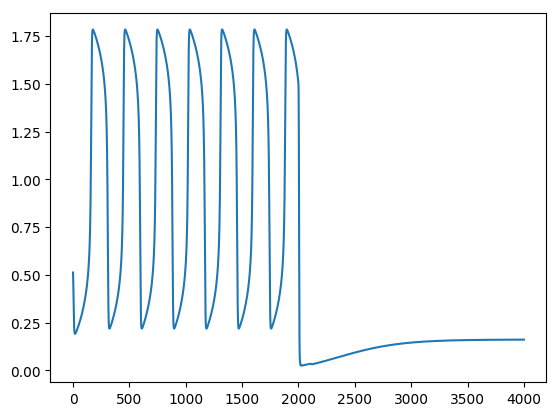

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f03a82d3890>

In [4]:
const k=0.75
const I1=1.0
const I2=2.0
const I3=0.5
const beta1=1.2
const beta3=0.5
const beta4=1.01
const x02=0.0

X=integration_loop()

plot(t,(X[3]))